# Proyek Analisis Data: E-COMMERCE PUBLIC
- **Nama:** Adelia Siska Ayu
- **Email:** m179b4kx0085@bangkit.academy
- **ID Dicoding:** adeliaasa

## Menentukan Pertanyaan Bisnis

1. Apa kategori produk yang paling banyak dan paling sedikit terjual
2. Apa tren penjualan bulanan di tahun ini (data terbaru di tahun 2018)


Dataset yang Dibutuhkan:
* orders_df: Informasi pesanan (tanggal, status)
* order_items_df: Detail produk yang terjual (produk, harga)
* products_df: Kategori produk
* customers_df: Lokasi pelanggan
* product_category_df: Terjemahan nama kategori produk

## Import Semua Packages/Library yang Digunakan

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [153]:
# Memuat datasets
orders_df = pd.read_csv('orders_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')
customers_df = pd.read_csv('customers_dataset.csv')
product_category_df = pd.read_csv('product_category_name_translation.csv')

In [154]:
#1
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [155]:
#2
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [156]:
#3
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [157]:
#4
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [158]:
#5
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Insight:

**orders_df = pd.read_csv('orders_dataset.csv')**: Memuat data pesanan ke dalam DataFrame orders_df

**order_items_df = pd.read_csv('order_items_dataset.csv')**: Memuat data terkait item pesanan ke dalam DataFrame order_items_df

**products_df = pd.read_csv('products_dataset.csv')**: Memuat data produk ke dalam DataFrame products_df

**customers_df = pd.read_csv('customers_dataset.csv')**: Memuat data pelanggan ke dalam DataFrame customers_df

**product_category_df = pd.read_csv('product_category_name_translation.csv')**: Memuat data terjemahan nama kategori produk ke dalam DataFrame product_category_df

**[nama_dataframe].head()**: Menampilkan 5 baris pertama dari masing-masing
DataFrame, untuk memastikan bahwa data telah berhasil dimuat dan untuk memahami struktur kolom yang ada.



### Assessing Data

### Menilai tabel `orders_df`

In [159]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [160]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [161]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai tabel `order_items_info`

In [162]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [163]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai tabel `products_df`

In [164]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [165]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [166]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai tabel `customers_df`

In [167]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [168]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai tabel `product_category_df`

In [169]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [170]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight: identifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan rangkumannya.**

**orders**
- 160 missing value (order_approved_at)
- 1783 missing value (order_delivered_carrier_date)
- 2965 missing value (order_delivered_customer_date)
- kesalahan tipe data (kolom 3-7)

**order_items**
- kesalahan tipe data

**products**
- 610 missing value (product_category_name, product_name_length, product_description_length, product_photos_qty)
- 2 missing value (product_weight_g, product_length_cm, product_height_cm, product_width_cm)

**customers**
- tidak ada

**product_category**
- tidak ada

### Cleaning Data

**Cleaning tabel `orders_df`**

In [171]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [172]:
#karena data yang null merupakan data dari orderan yang di cancel, maka dilakukan dropping.

orders_df.dropna(subset=['order_approved_at'], inplace=True)

print(orders_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64


In [173]:
#karena data yang null merupakan data dari orderan yang belum 'shipped', maka dilakukan dropping.
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [174]:
orders_df.dropna(subset=['order_delivered_carrier_date'], inplace=True)

print(orders_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1183
order_estimated_delivery_date       0
dtype: int64


In [175]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaN,2017-11-24 00:00:00
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaN,2018-08-03 00:00:00
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaN,2018-07-26 00:00:00
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaN,2018-07-24 00:00:00


In [176]:
# Mengubah kolom 'order_delivered_customer_date' menjadi tipe datetime
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')

In [177]:
# Menggunakan interpolasi dengan metode 'linear'
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].interpolate(method='linear')

# Memastikan tidak ada missing value lagi
print(orders_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [178]:
# Mengubah kolom-kolom yang berisi tanggal menjadi tipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Memeriksa kembali info dari dataframe
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97644 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97644 non-null  object        
 1   customer_id                    97644 non-null  object        
 2   order_status                   97644 non-null  object        
 3   order_purchase_timestamp       97644 non-null  datetime64[ns]
 4   order_approved_at              97644 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  97644 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97644 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


**Cleaning tabel `order_items_df`**

In [179]:
# Mengubah kolom 'order_delivered_customer_date' menjadi tipe datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Cleaning tabel `products_df`**

In [180]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [181]:
# Menghapus baris yang memiliki missing value di kolom-kolom
products_df = products_df.dropna(subset=['product_category_name', 'product_name_lenght',
                                                 'product_description_lenght', 'product_photos_qty'])

# Memastikan tidak ada missing value lagi di kolom-kolom tersebut
print(products_df.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64


In [182]:
# Menghapus baris yang memiliki missing value di kolom-kolom
products_df_cleaned = products_df.dropna(subset=['product_weight_g', 'product_length_cm',
                                                 'product_height_cm', 'product_width_cm'])

# Memastikan tidak ada missing value lagi di kolom-kolom tersebut
print(products_df_cleaned.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight:**
Dilakukan sejumlah proses untuk cleaning data pada tabel-tabel berikut:

**orders_df**
- 160 missing value (order_approved_at)
- 1783 missing value (order_delivered_carrier_date)
- 2965 missing value (order_delivered_customer_date)
- kesalahan tipe data (kolom 3-7)

*MENGHAPUS MISSING VALUE DAN MEMPERBAIKI TIPE DATA*

**order_items_df**
- kesalahan tipe data (shipping_limit_date)

*MEMPERBAIKI TIPE DATA*

**products_df**
- 610 missing value (product_category_name, product_name_length, product_description_length, product_photos_qty)
- 2 missing value (product_weight_g, product_length_cm, product_height_cm, product_width_cm)

*MENGHAPUS MISSING VALUE*

## Exploratory Data Analysis (EDA)

### Explore `orders_df`

In [183]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,97644,97644,97644,97644,97644,97644,97644,97644
unique,97644,97644,3,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96462,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 17:19:08.711339264,2018-01-02 03:36:36.634826240,2018-01-04 22:55:51.933677312,2018-01-14 14:04:16.118491904,2018-01-25 11:22:55.494653952
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-13 20:53:43.750000128,2017-09-14 08:15:17.750000128,2017-09-15 23:45:44.750000128,2017-09-26 19:27:27.500000,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:59:57,2018-01-22 13:49:16.500000,2018-01-24 16:38:54,2018-02-02 17:42:27,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 10:40:56.750000128,2018-05-05 16:53:35,2018-05-08 13:40:00,2018-05-15 18:51:06.249999872,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [184]:
#untuk melihat distribusi tiap order_status.
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96462
shipped,1107
canceled,75


### Explore `order_items_df`

In [185]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### Explore `products_df`

In [186]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.000000,32341.000000,32341.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245741,635.115225,1.736766,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### Explore `customers_df`

In [187]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### Explore `product_category_df`

In [188]:
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### tahap ekplorasi lanjutan

Untuk pertanyaan 1

In [189]:
#lakukan merge untuk tabel product dan product category
product_df = pd.merge(products_df, product_category_df, on='product_category_name')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [190]:
#gabungkan order_items_df dan product_df
order_items_df = pd.merge(order_items_df, product_df, on='product_id')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [191]:
#menganalisis pesanan yang statusnya "delivered" dan "shipped" dari orders_df.
#Gabungkan order_items_df dengan orders_df untuk mendapatkan informasi status pesanan.
fixed_orders = orders_df[(orders_df['order_status'] == 'delivered') | (orders_df['order_status'] == 'shipped')]
orders_fix_df = pd.merge(order_items_df, fixed_orders, on='order_id')
orders_fix_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,13.0,33.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,10.0,15.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,40.0,30.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [192]:
#hitung Jumlah Produk yang Terjual per Kategori
category_sales = orders_fix_df.groupby('product_category_name_english')['order_item_id'].count().sort_values(ascending=False)


In [193]:
# Menghitung total penjualan untuk setiap kategori produk
category_sales = orders_fix_df.groupby('product_category_name_english')['order_id'].count()

# Menentukan kategori produk yang paling banyak terjual
most_sold_category = category_sales.idxmax()
most_sold_sales = category_sales.max()

print(f"Kategori produk paling banyak terjual: {most_sold_category} dengan jumlah penjualan {most_sold_sales}")


Kategori produk paling banyak terjual: bed_bath_table dengan jumlah penjualan 11071


In [194]:
# Menghitung total penjualan untuk setiap kategori produk
category_sales = orders_fix_df.groupby('product_category_name_english')['order_id'].count()

# Menentukan kategori produk yang paling sedikit terjual
least_sold_category = category_sales.idxmin()
least_sold_sales = category_sales.min()

print(f"Kategori produk paling sedikit terjual: {least_sold_category} dengan jumlah penjualan {least_sold_sales}")


Kategori produk paling sedikit terjual: security_and_services dengan jumlah penjualan 2


In [195]:
orders_fix_df.to_csv("all_data.csv", index=False)

Untuk pertanyaan 2

In [196]:
# Filter untuk mendapatkan data tahun 2018
start_date = '2018-01-01'
end_date = '2018-12-31'
orders_2018_df = orders_fix_df[
    (orders_fix_df['order_purchase_timestamp'] >= start_date) &
    (orders_fix_df['order_purchase_timestamp'] <= end_date)
].copy()  # Menggunakan .copy() untuk menghindari peringatan

# Pastikan kolom 'month' sudah ditambahkan sebelumnya
orders_2018_df['month'] = orders_2018_df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah penjualan per kategori per bulan
monthly_category_sales = orders_2018_df.groupby(['month', 'product_category_name_english'])['order_id'].count().reset_index()

# Iterasi untuk mencetak hasil per bulan
for month, group in monthly_category_sales.groupby('month'):
    print(f"Sales untuk bulan {month}:")
    print(group[['product_category_name_english', 'order_id']])
    print("\n")  # Tambahkan baris baru untuk pemisahan




Sales untuk bulan 2018-01:
   product_category_name_english  order_id
0     agro_industry_and_commerce        18
1               air_conditioning        29
2                            art        19
3                          audio        26
4                           auto       267
..                           ...       ...
61                    stationery       390
62        tablets_printing_image         3
63                     telephony       371
64                          toys       164
65                 watches_gifts       359

[66 rows x 2 columns]


Sales untuk bulan 2018-02:
    product_category_name_english  order_id
66     agro_industry_and_commerce        26
67               air_conditioning        12
68                            art        12
69                          audio        15
70                           auto       318
..                            ...       ...
124                    stationery       154
125        tablets_printing_image        13
126      

In [197]:
# Menghitung jumlah penjualan per kategori per bulan
monthly_category_sales = orders_2018_df.groupby(['month', 'product_category_name_english'])['order_id'].count().reset_index()

# Menemukan kategori terlaris per bulan
best_selling_categories = monthly_category_sales.loc[monthly_category_sales.groupby('month')['order_id'].idxmax()]

# Menampilkan hasil
print(best_selling_categories)


       month            product_category_name_english  order_id
6    2018-01                           bed_bath_table       845
78   2018-02                    computers_accessories       975
135  2018-03                           bed_bath_table       795
202  2018-04                           bed_bath_table       745
301  2018-05                            health_beauty       760
364  2018-06                            health_beauty       884
429  2018-07                            health_beauty       781
493  2018-08                            health_beauty       841
517  2018-09  kitchen_dining_laundry_garden_furniture         1


In [198]:
# Menghitung jumlah penjualan per kategori per bulan
monthly_category_sales = orders_2018_df.groupby(['month', 'product_category_name_english'])['order_id'].count().reset_index()

# Menemukan tiga kategori terlaris per bulan
top_selling_categories = monthly_category_sales.groupby('month').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)

# Menampilkan hasil
print(top_selling_categories)


      month            product_category_name_english  order_id
0   2018-01                           bed_bath_table       845
1   2018-01                    computers_accessories       697
2   2018-01                           sports_leisure       644
3   2018-02                    computers_accessories       975
4   2018-02                           bed_bath_table       686
5   2018-02                            health_beauty       660
6   2018-03                           bed_bath_table       795
7   2018-03                    computers_accessories       756
8   2018-03                           sports_leisure       746
9   2018-04                           bed_bath_table       745
10  2018-04                            health_beauty       692
11  2018-04                           sports_leisure       595
12  2018-05                            health_beauty       760
13  2018-05                           bed_bath_table       746
14  2018-05                            watches_gifts   

<ipython-input-198-01832e39802b>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_selling_categories = monthly_category_sales.groupby('month').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)


In [199]:
orders_2018_df.to_csv("2018_data.csv", index=False)

**Insight:**

Proses ini membantu kita untuk memahami struktur data dan menganalisis data untuk mendapat data yang baik.

contohnya, di tabel `order_status`, kita harus menghapus pesanan yang berstatus cancelled agar hasil analisis akurat dan menggabungkan tabel-tabel untuk mempermudah proses analisis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa kategori produk yang paling banyak dan paling sedikit terjual

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


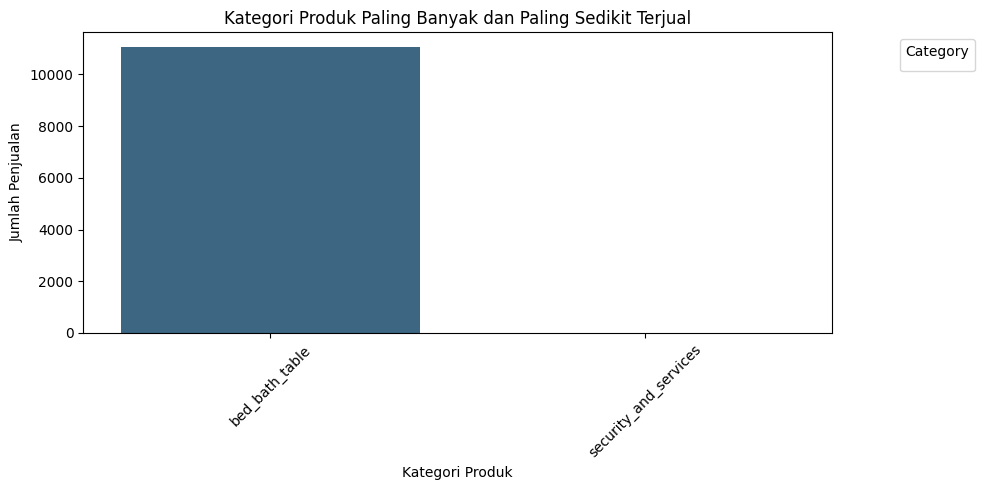

In [200]:
# Menghitung total penjualan untuk setiap kategori produk
category_sales = orders_fix_df.groupby('product_category_name_english')['order_id'].count()

# Menentukan kategori produk yang paling banyak terjual
most_sold_category = category_sales.idxmax()
most_sold_sales = category_sales.max()

# Menentukan kategori produk yang paling sedikit terjual
least_sold_category = category_sales.idxmin()
least_sold_sales = category_sales.min()

# Membuat DataFrame untuk visualisasi
sales_data = pd.DataFrame({
    'Category': [most_sold_category, least_sold_category],
    'Sales': [most_sold_sales, least_sold_sales]
})

# Mengatur ukuran grafik
plt.figure(figsize=(10, 5))

# Membuat bar plot
sns.barplot(x='Category', y='Sales', data=sales_data, hue='Category', dodge=False, palette='viridis')

# Menambahkan judul dan label
plt.title('Kategori Produk Paling Banyak dan Paling Sedikit Terjual')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Penjualan')

# Menampilkan grafik
plt.xticks(rotation=45)  # Memutar label kategori untuk keterbacaan
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()


### Pertanyaan 2: Apa tren penjualan bulanan di tahun ini (data terbaru di tahun 2018)

<ipython-input-201-6bf4c9a24eb9>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_selling_categories = monthly_category_sales.groupby('month').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

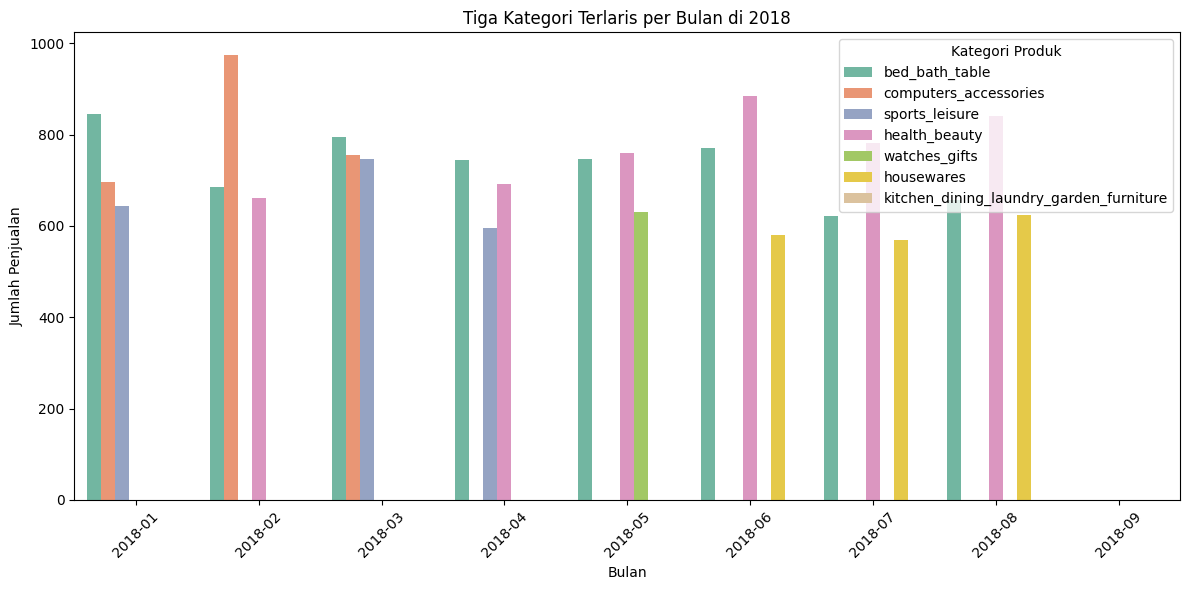

In [201]:
# Menghitung jumlah penjualan per kategori per bulan
monthly_category_sales = orders_2018_df.groupby(['month', 'product_category_name_english'])['order_id'].count().reset_index()

# Menemukan tiga kategori terlaris per bulan
top_selling_categories = monthly_category_sales.groupby('month').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)

# Visualisasi
plt.figure(figsize=(12, 6))

# Membuat bar plot untuk setiap kategori teratas per bulan
sns.barplot(data=top_selling_categories, x='month', y='order_id', hue='product_category_name_english', palette='Set2')

plt.title('Tiga Kategori Terlaris per Bulan di 2018')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()



**Insight:**
- visualisasi pertanyaan 1

Grafik batang menunjukkan dengan jelas kategori produk yang paling banyak dan paling sedikit terjual. Dari hasil analisis, kita melihat bahwa kategori bed_bath_table memiliki penjualan yang jauh lebih tinggi dibandingkan kategori security_and_services.

Penjualan yang tinggi untuk bed_bath_table menunjukkan bahwa produk ini sangat diminati oleh konsumen, sementara kategori security_and_services mungkin memerlukan perhatian lebih lanjut dari perusahaan untuk meningkatkan pemasaran atau penawaran produk.

- visualisasi pertanyaan 2

Dari grafik, terlihat bahwa kategori-kategori tertentu seperti bed_bath_table dan health_beauty muncul secara konsisten sebagai kategori terlaris sepanjang tahun 2018.

Setiap bulan menunjukkan variasi dalam kategori terlaris, dengan beberapa kategori seperti computers_accessories juga mendapatkan perhatian tinggi di bulan-bulan tertentu.

## Analisis Lanjutan (Opsional)

## Conclusion

**pertanyaan 1**

Kategori produk bed_bath_table merupakan yang paling banyak terjual dengan jumlah penjualan mencapai 11,071 unit. Angka penjualan yang tinggi ini menunjukkan bahwa produk-produk dalam kategori ini sangat diminati oleh konsumen, mungkin karena faktor seperti keberagaman pilihan, kualitas, dan kebutuhan dasar dalam perawatan rumah tangga.

Sebaliknya, kategori produk security_and_services hanya terjual sebanyak 2 unit. Penjualan yang sangat rendah ini bisa jadi menunjukkan bahwa produk atau layanan dalam kategori ini kurang menarik bagi konsumen, mungkin karena kurangnya promosi, kesadaran akan pentingnya keamanan, atau bahkan ketidakpahaman tentang produk yang ditawarkan.

**pertanyaan 2**

Dari data penjualan bulanan di tahun 2018, terlihat bahwa bed_bath_table konsisten menjadi salah satu kategori terlaris setiap bulannya. Misalnya, di bulan Januari, kategori ini terjual sebanyak 845 unit, dan terus menunjukkan penjualan yang baik hingga bulan-bulan berikutnya. Ini menunjukkan keberlanjutan dalam permintaan untuk produk-produk dalam kategori ini sepanjang tahun.

Computers_accessories juga menunjukkan kinerja yang baik, terutama di bulan Februari, dengan penjualan mencapai 975 unit. Tren ini mungkin mencerminkan meningkatnya minat terhadap teknologi dan aksesori komputer.

Health_beauty muncul sebagai kategori yang juga cukup kuat, sering berada di antara tiga besar terlaris setiap bulan. Hal ini bisa dihubungkan dengan tren konsumen yang semakin peduli terhadap kesehatan dan penampilan pribadi, mungkin didorong oleh promosi produk atau kampanye pemasaran yang efektif.